In [41]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, LSTM, RepeatVector, TimeDistributed
from keras.utils import np_utils
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
num = 100
images = X_train[:num]
labels = y_train[:num]

IndexError: index 5 is out of bounds for axis 0 with size 5

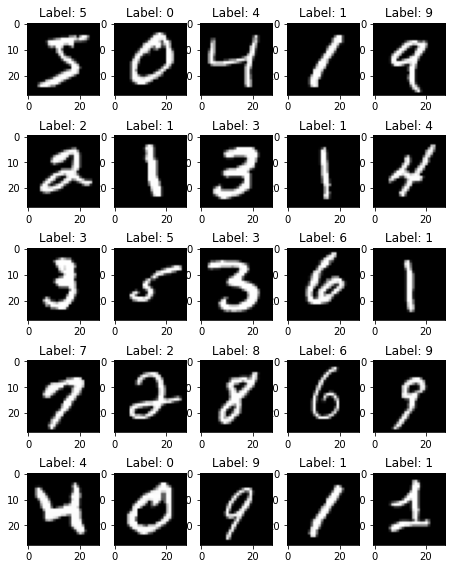

In [4]:
import matplotlib.pyplot as plt

num_row = 5
num_col = 5# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [23]:
print(abs(X_train[0][0][0] - 255))

255


In [28]:
def invert_row_vals(row):
    y_row = [0]*len(row)
    for x in range(len(row)):
        y_row[x] = (abs(row[x] - 255))
    return y_row

def invert_image(image):
    y_image =[0]*len(image)
    for x in range(len(image)):
        y_image[x] = invert_row_vals(image[x])
    return y_image

def invertXimages(images):
    inv = [0]*len(images)
    for x in range(len(images)):
        inv[x] = invert_image(images[x])
    return inv

In [29]:
Y_train = invertXimages(X_train)

In [32]:
Y_test = invertXimages(X_test)

In [30]:
Y_train[0]

[[255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255,
  255],
 [255,
  255,
 

In [36]:
#Convert
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [45]:
X_train.shape

(60000, 28, 28, 1)

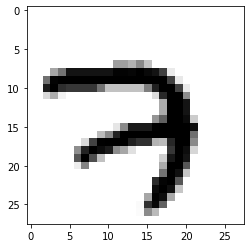

In [31]:
# pick a sample to plot
sample = 5000
image = Y_train[sample]# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [55]:
X_train = X_train[:1000]
X_test = X_test[:1000]
Y_train = Y_train[:1000]
Y_test = Y_test[:1000]

In [56]:
# building the input vector from the 28x28 pixels
X_tr = X_train.reshape(X_train.shape[0] * 28, 28, 1)
X_te = X_test.reshape(X_test.shape[0] * 28, 28, 1)
Y_tr = Y_train.reshape(Y_train.shape[0] * 28, 28, 1)
Y_te = Y_test.reshape(Y_test.shape[0] * 28, 28, 1)
# X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')

In [ ]:
# Normalize the image pixel values (divide by 255)
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [57]:
X_tr.shape
print(Y_te.shape)

(28000, 28, 1)


In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

In [58]:
model = Sequential()

# encoder layer
model.add(LSTM(100, activation='relu', input_shape=(28, 1)))

# repeat vector
model.add(RepeatVector(28))

# decoder layer
model.add(LSTM(100, activation='relu', return_sequences=True))

model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 28, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 28, 100)           80400     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 28, 1)             101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


In [59]:
model.fit(X_tr, Y_tr, validation_data=(X_te, Y_te), epochs=1000, batch_size=3)

Epoch 1/1000
9334/9334 [==============================] - 336s 36ms/step - loss: 5997094400.0000 - val_loss: 49174.6914
Epoch 2/1000
9334/9334 [==============================] - 372s 40ms/step - loss: 182186000.0000 - val_loss: 575844.7500
Epoch 3/1000
9334/9334 [==============================] - 399s 43ms/step - loss: 183436.4688 - val_loss: 22207.7266
Epoch 4/1000
9334/9334 [==============================] - 397s 42ms/step - loss: 43578756.0000 - val_loss: 28907.1641
Epoch 5/1000
4442/9334 [=============>................] - ETA: 2:32 - loss: 318646.8438 ETA: 2:32 -

KeyboardInterrupt: 